In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [19]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 5 point summery (Boxplot)



<Axes: ylabel='total_bill'>

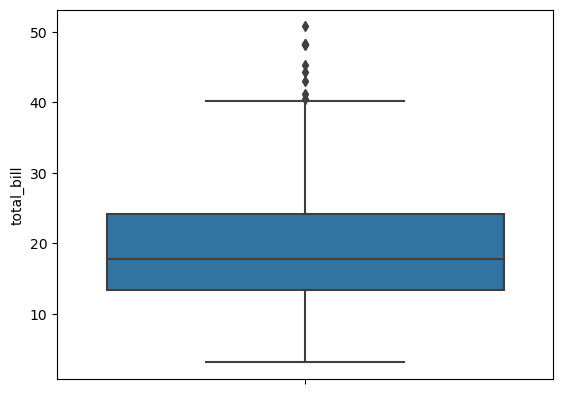

In [22]:
sns.boxplot(y = 'total_bill',data=df)

<Axes: xlabel='total_bill', ylabel='Count'>

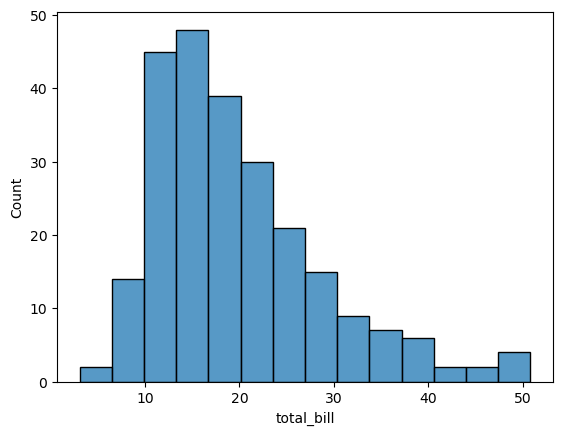

In [23]:
sns.histplot(x='total_bill',data=df)

In [24]:
df.skew()

C:\Users\91934\AppData\Local\Temp\ipykernel_14592\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

# IQR method

In [25]:
q1 =df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)

iqr = q3-q1
pos_outlier = q3+1.5*iqr
neg_outlier = q3-1.5*iqr
print(pos_outlier)
print(neg_outlier)

print('---------------------------------')
for i in df['total_bill']:
    if i>pos_outlier or i<neg_outlier:
        print(i)

40.29749999999999
7.957500000000003
---------------------------------
48.27
3.07
5.75
44.3
7.25
41.19
7.51
48.17
50.81
7.25
45.35
40.55
7.56
43.11
48.33
7.74


# Finding outlier using z-score

In [26]:
from scipy.stats import zscore

df['zscore'] = zscore(df['total_bill'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [28]:
df[(df['zscore']>3) | (df['zscore']<-3)]

,total_bill,tip,sex,smoker,day,time,size,zscore
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [30]:
df[(df['total_bill']>pos_outlier) | (df['total_bill']<neg_outlier)]

,total_bill,tip,sex,smoker,day,time,size,zscore
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
67,3.07,1.00,Female,Yes,Sat,Dinner,1,-1.881547
92,5.75,1.00,Female,Yes,Fri,Dinner,2,-1.579886
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.759302
111,7.25,1.00,Female,No,Sat,Dinner,1,-1.411046
142,41.19,5.00,Male,No,Thur,Lunch,5,2.409241
149,7.51,2.00,Male,No,Thur,Lunch,2,-1.381780
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
172,7.25,5.15,Male,Yes,Sun,Dinner,2,-1.411046


In [31]:
df.corr()

C:\Users\91934\AppData\Local\Temp\ipykernel_14592\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size,zscore
total_bill,1.000000,0.675734,0.598315,1.000000
tip,0.675734,1.000000,0.489299,0.675734
size,0.598315,0.489299,1.000000,0.598315
zscore,1.000000,0.675734,0.598315,1.000000


# ztest

In [40]:
#One sample
from statsmodels.stats.weightstats import ztest


sample_1 = np.arange(120,180,2)
print(sample_1)

[120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154
 156 158 160 162 164 166 168 170 172 174 176 178]


In [37]:
z,pval = ztest(sample_1,value=156,alternative='two-sided')
print(z,pval)

-2.177598558933893 0.0294359369343824


In [41]:
#Two sample
# Sample data
sample1 = np.array([25, 30, 28, 35, 34, 36, 29, 28, 31, 26])
sample2 = np.array([27, 32, 30, 31, 32, 33, 28, 26, 29, 30])

z_statistic, p_value = ztest(sample1, sample2)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Z-statistic: 0.28669108954049694
P-value: 0.77434886084742
Fail to reject the null hypothesis: There is no significant difference between the means.


# t-test

In [43]:
from scipy.stats import ttest_1samp
sample=[5,6,7,1,0,8,5,78,9,50,0,23,6,2,1,6,1]

In [44]:
t,pval=ttest_1samp(sample,50,alternative='two-sided')
print(t,pval)

-7.483351086128518 1.3039992685798587e-06


# paired t-test

In [46]:
before = [20,30,40,10,20,50,70]
after = [50,70,80,90,20,100,110]

from scipy.stats import ttest_rel


In [48]:
# Perform paired t-test
t_statistic, p_value = ttest_rel(before, after)

print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")


Paired t-test results:
T-statistic: -4.44575144180969
P-value: 0.0043489159597987085
Reject the null hypothesis: There is a significant difference between the means.


# One way annova

In [51]:
g1 = [20,30,40,10,20,50,70]
g2 = [50,70,80,90,20,100,110]
g3 = [34,67,23,71,90,2,10]

from scipy.stats import ttest_rel

f_statistic, p_value = f_oneway(g1, g2, g3)

print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of at least two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the groups.")




One-way ANOVA results:
F-statistic: 3.713900719912556
P-value: 0.044634763993880514
Reject the null hypothesis: There is a significant difference between the means of at least two groups.



# Chi Square Test 

In [52]:
#  Use Chi Square Test 
from scipy.stats import chisquare

observed= [18,36,21,9,6,12,36,45,36,21,6,9,9,3,3,3,9,9,6,3]
expected = [11.7,27,25.2,16.2,9.9,19.5,45,42,27,16.5,3.9,9,8.4,5.4,3.3,3.9,9,8.4,5.4,3.3]

ChiSquareStatistic,Pvalue=chisquare(f_obs = observed , f_exp = expected)

print(ChiSquareStatistic,Pvalue)

23.56689976689977 0.21329327923202174
